In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day 5/Kyphosis.csv")
le = LabelEncoder()
y = le.fit_transform(df["Kyphosis"])
X = df.drop("Kyphosis", axis = 1)


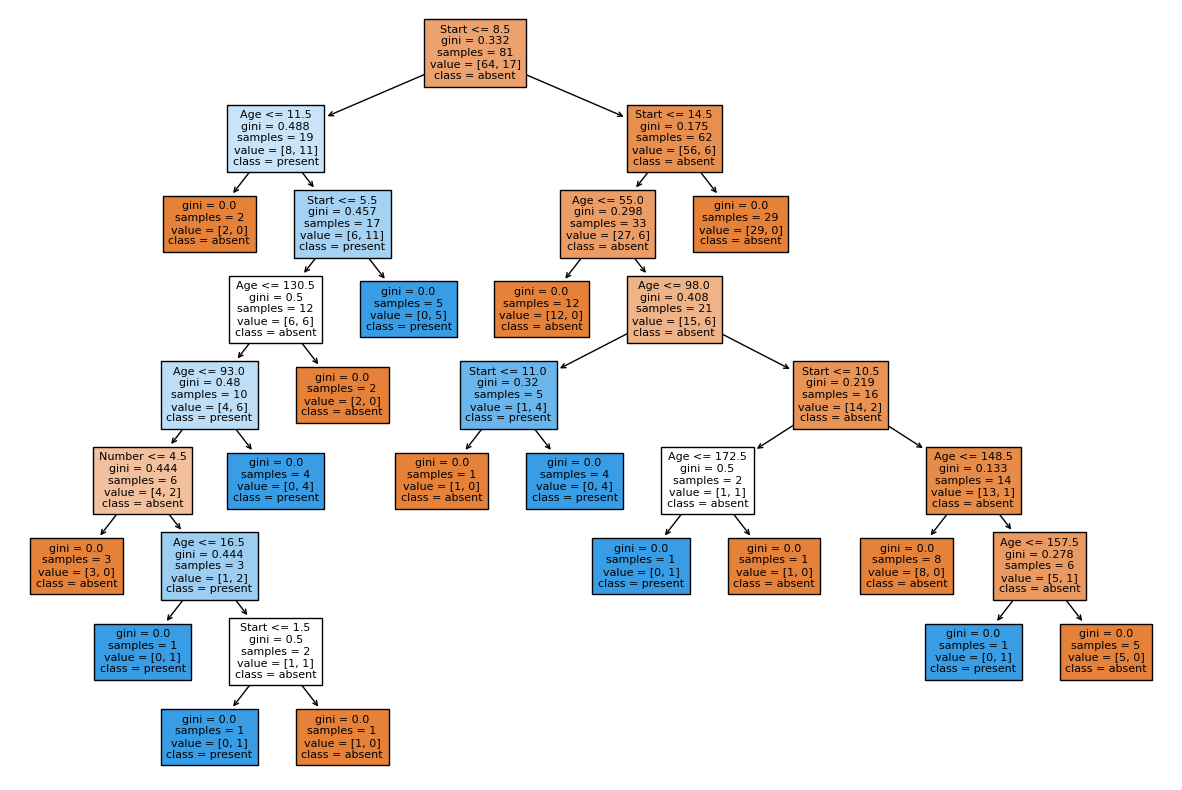

In [3]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

#plotting tree
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['absent','present'],
               filled=True,fontsize=8);

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   stratify=y,
                                   random_state=24)

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [8]:
# for max_depth = 3 (cutting down tree to avoid overfitting)
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [9]:
#gridsearch to find best max_depth, min_samples_leaf, min_samples_split
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=24)

params = { 'min_samples_split' : [2, 4, 6, 10 ,20], 'min_samples_leaf':[1, 5, 10, 15], 'max_depth': [None, 4, 3, 2]}
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'neg_log_loss')
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

-0.8025112313520752
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [7]:
pd_cv = pd.DataFrame(gcv.cv_results_)
pd_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001808,0.000979,0.002701,0.002148,None,1,2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.360645,-15.769098,-4.505457,-9.010913,-11.263642,-9.381951,3.934020,79
1,0.000465,0.000580,0.001001,0.001264,None,1,4,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.360645,-15.769098,-4.505457,-9.010913,-11.263642,-9.381951,3.934020,79
2,0.000933,0.000900,0.000797,0.000976,None,1,6,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-6.424538,-0.457369,-4.523437,-6.815453,-9.097557,-5.463671,2.894920,77
3,0.001007,0.000630,0.001395,0.000797,None,1,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-4.369392,-0.587334,-6.910442,-6.832145,-7.062726,-5.152408,2.490563,76
4,0.001602,0.000495,0.001820,0.000416,None,1,20,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-2.377219,-0.379021,-0.303019,-2.542416,-0.286234,-1.177582,1.048710,44


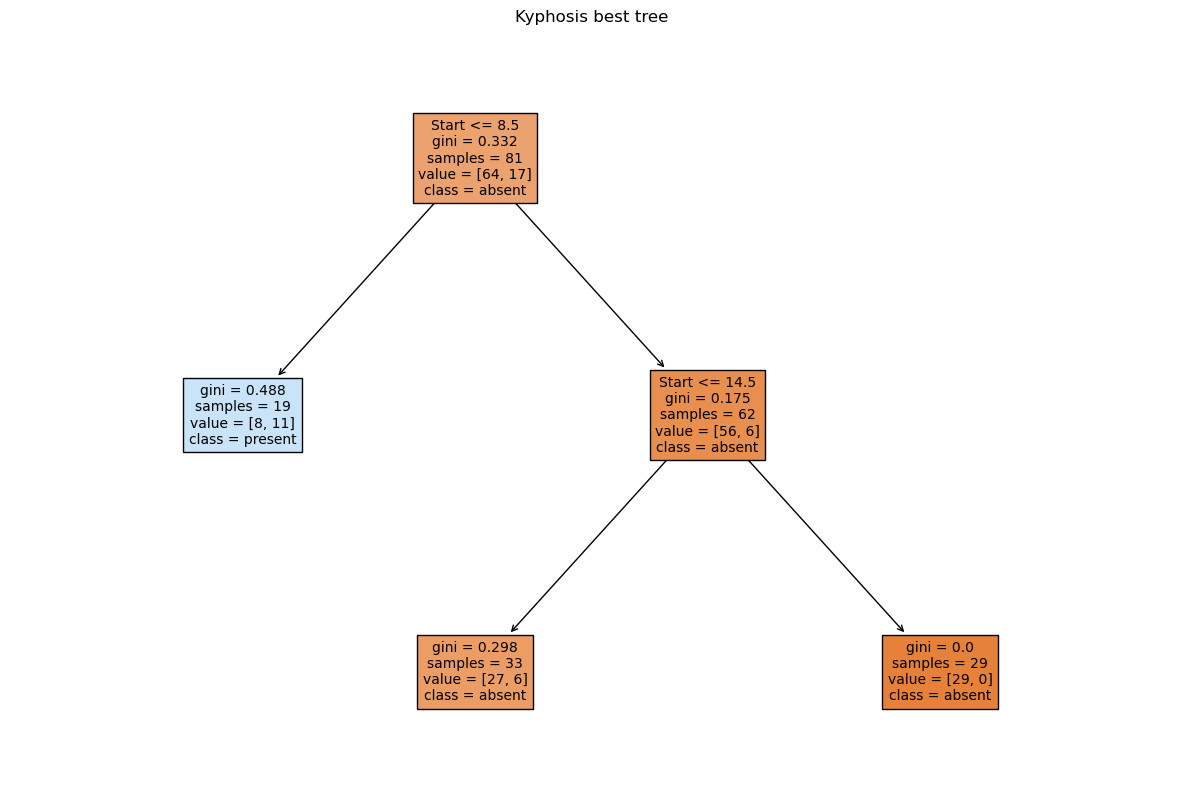

In [12]:
#plotting best tree 
best_tree = gcv.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['absent','present'] #or class_names=['0','1'],           
               filled=True,fontsize=10);
plt.title("Kyphosis best tree");